> **Overview of NBA Fair Value Calculator (FVC)**



*   Proportion of Luxury Tax and/or 1st Apron occuppied by new contracts' avg. annual value (AAV) vs. "Production" (before & after signing)
*   Other considerations: playoff performance, team win% post signing, attendance (i.e. revenue)



# Sourcing & Pre-Processing Data

## League Salary Cap Info

In [5]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

url = 'https://basketball.realgm.com/nba/info/salary_cap'

# Fetch the page content
response = requests.get(url)
html_content = response.content

# Parse the HTML with BeautifulSoup
soup = BeautifulSoup(html_content, 'html.parser')

# Initialize lists to store the data
seasons = []
salary_caps = []
luxury_taxes = []
first_aprons = []
second_aprons = []

# Select all rows in the table body
rows = soup.find_all('tr')

for row in rows:
    cols = row.find_all('td')
    # Ensure the row contains at least the number of columns we are interested in
    if len(cols) >= 7:
        season = cols[2].text.strip()       # The 3rd <td> element corresponds to 'Season'
        salary_cap = cols[3].text.strip()   # The 4th <td> element corresponds to 'Salary Cap'
        luxury_tax = cols[4].text.strip()   # The 5th <td> element corresponds to 'Luxury Tax'
        first_apron = cols[5].text.strip()  # The 6th <td> element corresponds to '1st Apron'
        second_apron = cols[6].text.strip() # The 7th <td> element corresponds to '2nd Apron'

        # Filter out rows where 'Season' is formatted differently or data is misaligned
        if season and season != '-' and '$' in salary_cap:
            # Append the extracted data to the lists
            seasons.append(season)
            salary_caps.append(salary_cap)
            luxury_taxes.append(luxury_tax)
            first_aprons.append(first_apron)
            second_aprons.append(second_apron)

# Create a DataFrame from the lists
NBA_salary_cap = pd.DataFrame({
    'Season': seasons,
    'Salary Cap': salary_caps,
    'Luxury Tax': luxury_taxes,
    '1st Apron': first_aprons,
    '2nd Apron': second_aprons
})

# Display the DataFrame
NBA_salary_cap.head()

,Season,Salary Cap,Luxury Tax,1st Apron,2nd Apron
0,2034-2035,"$364,650,000","$443,050,000","$461,955,000","$489,965,000"
1,2033-2034,"$331,500,000","$402,773,000","$419,960,000","$445,423,000"
2,2032-2033,"$301,364,000","$366,157,000","$381,781,000","$404,929,000"
3,2031-2032,"$273,967,000","$332,870,000","$347,074,000","$368,118,000"
4,2030-2031,"$249,061,000","$302,609,000","$315,522,000","$334,652,000"


### Visual

In [6]:
import plotly.express as px
import requests
from bs4 import BeautifulSoup
import pandas as pd

# Convert necessary columns to numeric (remove $, commas)
NBA_salary_cap['Salary Cap'] = NBA_salary_cap['Salary Cap'].replace('[\$,]', '', regex=True).astype(int)
NBA_salary_cap['Luxury Tax'] = NBA_salary_cap['Luxury Tax'].replace('[\$,]', '', regex=True).replace('N/A', '0').astype(int)
NBA_salary_cap['1st Apron'] = NBA_salary_cap['1st Apron'].replace('[\$,]', '', regex=True).replace('N/A', '0').astype(int)

# Set the order of the DataFrame to have the oldest season first
NBA_salary_cap_increasing = NBA_salary_cap.iloc[::-1]

# Create the line plot
fig = px.line(NBA_salary_cap_increasing, x='Season', y=['Salary Cap', 'Luxury Tax', '1st Apron'],
              title='NBA Salary Cap, Luxury Tax, and 1st Apron Increase Per Season',
              labels={'Season': 'Season', 'value': 'Amount ($)', 'variable': 'Category'})

# Customize layout
fig.update_layout(
    xaxis_title='Season',
    yaxis_title='Amount ($)',
    xaxis_tickangle=-45,
    xaxis=dict(
        tickmode='array',
        tickvals=[NBA_salary_cap_increasing['Season'][i] for i in range(0, len(NBA_salary_cap_increasing), 4)]
    ),
    margin=dict(l=40, r=40, t=40, b=80)
)

fig.show()

## Player Contracts

### Web-Scrapping

In [7]:
# # Contracts signed in 2020
# import requests
# from bs4 import BeautifulSoup
# import pandas as pd

# url = 'https://www.spotrac.com/nba/contracts/_/year/2020/sort/value'

# # Fetch page content
# response = requests.get(url)
# html_content = response.content

# # Parse HTML with BeautifulSoup
# soup = BeautifulSoup(html_content, 'html.parser')

# # Initialize lists to hold data
# players = []
# positions = []
# ages = []
# starts = []
# ends = []
# years = []
# values = []
# aavs = []

# # Find all rows in the table
# rows = soup.find_all('tr')

# # Iterate over each row to extract data
# for row in rows:
#     cols = row.find_all('td')
#     if len(cols) > 1:  # To ensure we skip any non-relevant rows
#         player = cols[1].text.strip()
#         position = cols[2].text.strip()
#         age = cols[4].text.strip()
#         start = cols[5].text.strip()
#         end = cols[6].text.strip()
#         year_length = cols[7].text.strip()
#         value = cols[8].text.strip()
#         aav = cols[9].text.strip()

#         # Append data to lists
#         players.append(player)
#         positions.append(position)
#         ages.append(age)
#         starts.append(start)
#         ends.append(end)
#         years.append(year_length)
#         values.append(value)
#         aavs.append(aav)

# # Create a DataFrame from the lists
# NBA_contracts_2020 = pd.DataFrame({
#     'Player': players,
#     'POS': positions,
#     'Age at Signing': ages,
#     'Start': starts,
#     'End': ends,
#     'YRS': years,
#     'Value': values,
#     'AAV': aavs
# })

# # Display the DataFrame
# NBA_contracts_2020.head()

In [8]:
# # Contracts signed in 2021
# import requests
# from bs4 import BeautifulSoup
# import pandas as pd

# url = 'https://www.spotrac.com/nba/contracts/_/year/2021/sort/value'

# # Fetch page content
# response = requests.get(url)
# html_content = response.content

# # Parse HTML with BeautifulSoup
# soup = BeautifulSoup(html_content, 'html.parser')

# # Initialize lists to hold data
# players = []
# positions = []
# ages = []
# starts = []
# ends = []
# years = []
# values = []
# aavs = []

# # Find all rows in the table
# rows = soup.find_all('tr')

# # Iterate over each row to extract data
# for row in rows:
#     cols = row.find_all('td')
#     if len(cols) > 1:  # To ensure we skip any non-relevant rows
#         player = cols[1].text.strip()
#         position = cols[2].text.strip()
#         age = cols[4].text.strip()
#         start = cols[5].text.strip()
#         end = cols[6].text.strip()
#         year_length = cols[7].text.strip()
#         value = cols[8].text.strip()
#         aav = cols[9].text.strip()

#         # Append data to lists
#         players.append(player)
#         positions.append(position)
#         ages.append(age)
#         starts.append(start)
#         ends.append(end)
#         years.append(year_length)
#         values.append(value)
#         aavs.append(aav)

# # Create a DataFrame from the lists
# NBA_contracts_2021 = pd.DataFrame({
#     'Player': players,
#     'POS': positions,
#     'Age at Signing': ages,
#     'Start': starts,
#     'End': ends,
#     'YRS': years,
#     'Value': values,
#     'AAV': aavs
# })

# # Display the DataFrame
# NBA_contracts_2021.tail()

In [9]:
# # Contracts signed in 2022
# import requests
# from bs4 import BeautifulSoup
# import pandas as pd

# url = 'https://www.spotrac.com/nba/contracts/_/year/2022/sort/value'

# # Fetch page content
# response = requests.get(url)
# html_content = response.content

# # Parse HTML with BeautifulSoup
# soup = BeautifulSoup(html_content, 'html.parser')

# # Initialize lists to hold data
# players = []
# positions = []
# ages = []
# starts = []
# ends = []
# years = []
# values = []
# aavs = []

# # Find all rows in the table
# rows = soup.find_all('tr')

# # Iterate over each row to extract data
# for row in rows:
#     cols = row.find_all('td')
#     if len(cols) > 1:  # To ensure we skip any non-relevant rows
#         player = cols[1].text.strip()
#         position = cols[2].text.strip()
#         age = cols[4].text.strip()
#         start = cols[5].text.strip()
#         end = cols[6].text.strip()
#         year_length = cols[7].text.strip()
#         value = cols[8].text.strip()
#         aav = cols[9].text.strip()

#         # Append data to lists
#         players.append(player)
#         positions.append(position)
#         ages.append(age)
#         starts.append(start)
#         ends.append(end)
#         years.append(year_length)
#         values.append(value)
#         aavs.append(aav)

# # Create a DataFrame from the lists
# NBA_contracts_2022 = pd.DataFrame({
#     'Player': players,
#     'POS': positions,
#     'Age at Signing': ages,
#     'Start': starts,
#     'End': ends,
#     'YRS': years,
#     'Value': values,
#     'AAV': aavs
# })

# # Display the DataFrame
# NBA_contracts_2022.tail()

In [10]:
# # Contracts signed in 2023
# import requests
# from bs4 import BeautifulSoup
# import pandas as pd

# url = 'https://www.spotrac.com/nba/contracts/_/year/2023/sort/value'

# # Fetch page content
# response = requests.get(url)
# html_content = response.content

# # Parse HTML with BeautifulSoup
# soup = BeautifulSoup(html_content, 'html.parser')

# # Initialize lists to hold data
# players = []
# positions = []
# ages = []
# starts = []
# ends = []
# years = []
# values = []
# aavs = []

# # Find all rows in the table
# rows = soup.find_all('tr')

# # Iterate over each row to extract data
# for row in rows:
#     cols = row.find_all('td')
#     if len(cols) > 1:  # To ensure we skip any non-relevant rows
#         player = cols[1].text.strip()
#         position = cols[2].text.strip()
#         age = cols[4].text.strip()
#         start = cols[5].text.strip()
#         end = cols[6].text.strip()
#         year_length = cols[7].text.strip()
#         value = cols[8].text.strip()
#         aav = cols[9].text.strip()

#         # Append data to lists
#         players.append(player)
#         positions.append(position)
#         ages.append(age)
#         starts.append(start)
#         ends.append(end)
#         years.append(year_length)
#         values.append(value)
#         aavs.append(aav)

# # Create a DataFrame from the lists
# NBA_contracts_2023 = pd.DataFrame({
#     'Player': players,
#     'POS': positions,
#     'Age at Signing': ages,
#     'Start': starts,
#     'End': ends,
#     'YRS': years,
#     'Value': values,
#     'AAV': aavs
# })

# # Display the DataFrame
# NBA_contracts_2023.tail()

In [11]:
# # Contracts signed in 2024
# import requests
# from bs4 import BeautifulSoup
# import pandas as pd

# url = 'https://www.spotrac.com/nba/contracts/_/year/2024/sort/value'

# # Fetch page content
# response = requests.get(url)
# html_content = response.content

# # Parse HTML with BeautifulSoup
# soup = BeautifulSoup(html_content, 'html.parser')

# # Initialize lists to hold data
# players = []
# positions = []
# ages = []
# starts = []
# ends = []
# years = []
# values = []
# aavs = []

# # Find all rows in the table
# rows = soup.find_all('tr')

# # Iterate over each row to extract data
# for row in rows:
#     cols = row.find_all('td')
#     if len(cols) > 1:  # To ensure we skip any non-relevant rows
#         player = cols[1].text.strip()
#         position = cols[2].text.strip()
#         age = cols[4].text.strip()
#         start = cols[5].text.strip()
#         end = cols[6].text.strip()
#         year_length = cols[7].text.strip()
#         value = cols[8].text.strip()
#         aav = cols[9].text.strip()

#         # Append data to lists
#         players.append(player)
#         positions.append(position)
#         ages.append(age)
#         starts.append(start)
#         ends.append(end)
#         years.append(year_length)
#         values.append(value)
#         aavs.append(aav)

# # Create a DataFrame from the lists
# NBA_contracts_2024 = pd.DataFrame({
#     'Player': players,
#     'POS': positions,
#     'Age at Signing': ages,
#     'Start': starts,
#     'End': ends,
#     'YRS': years,
#     'Value': values,
#     'AAV': aavs
# })

# # Display the DataFrame
# NBA_contracts_2024.tail()

### Importing Spotrac 2014-2024 Signings

In [13]:
from google.colab import files

uploaded = files.upload()

# Specify file name
NBA_2014_contracts = "NBA 2014 Contracts.csv"

# Read CSV file into Pandas DataFrame
NBA_contracts_2014 = pd.read_csv(NBA_2014_contracts)

# Rename columns ("wtf Spotrac")
NBA_contracts_2014 = NBA_contracts_2014.rename(columns={
    'Team\n                        Signed With': 'Team Signed With',
    'Age\n                        At Signing': 'Age At Signing'
})

# Fix duplicate team names (another "wtf Spotrac")
NBA_contracts_2014['Team Signed With'] = NBA_contracts_2014['Team Signed With'].apply(lambda x: x.split()[0])

NBA_contracts_2014.head()

KeyboardInterrupt: 

In [ ]:
uploaded = files.upload()

# Specify file name
NBA_2015_contracts = "NBA 2015 Contracts.csv"

# Read CSV file into Pandas DataFrame
NBA_contracts_2015 = pd.read_csv(NBA_2015_contracts)

# Rename columns ("wtf Spotrac")
NBA_contracts_2015 = NBA_contracts_2015.rename(columns={
    'Team\n                        Signed With': 'Team Signed With',
    'Age\n                        At Signing': 'Age At Signing'
})

# Fix duplicate team names (another "wtf Spotrac")
NBA_contracts_2015['Team Signed With'] = NBA_contracts_2015['Team Signed With'].apply(lambda x: x.split()[0])

NBA_contracts_2015.head()

In [ ]:
uploaded = files.upload()

# Specify file name
NBA_2016_contracts = "NBA 2016 Contracts.csv"

# Read CSV file into Pandas DataFrame
NBA_contracts_2016 = pd.read_csv(NBA_2016_contracts)

# Rename columns ("wtf Spotrac")
NBA_contracts_2016 = NBA_contracts_2016.rename(columns={
    'Team\n                        Signed With': 'Team Signed With',
    'Age\n                        At Signing': 'Age At Signing'
})

# Fix duplicate team names (another "wtf Spotrac")
NBA_contracts_2016['Team Signed With'] = NBA_contracts_2016['Team Signed With'].apply(lambda x: x.split()[0])

NBA_contracts_2016.head()

In [ ]:
uploaded = files.upload()

# Specify file name
NBA_2017_contracts = "NBA 2017 Contracts.csv"

# Read CSV file into Pandas DataFrame
NBA_contracts_2017 = pd.read_csv(NBA_2017_contracts)

# Rename columns ("wtf Spotrac")
NBA_contracts_2017 = NBA_contracts_2017.rename(columns={
    'Team\n                        Signed With': 'Team Signed With',
    'Age\n                        At Signing': 'Age At Signing'
})

# Fix duplicate team names (another "wtf Spotrac")
NBA_contracts_2017['Team Signed With'] = NBA_contracts_2017['Team Signed With'].apply(lambda x: x.split()[0])

NBA_contracts_2017.head()

In [ ]:
uploaded = files.upload()

# Specify file name
NBA_2018_contracts = "NBA 2018 Contracts.csv"

# Read CSV file into Pandas DataFrame
NBA_contracts_2018 = pd.read_csv(NBA_2018_contracts)

# Rename columns ("wtf Spotrac")
NBA_contracts_2018 = NBA_contracts_2018.rename(columns={
    'Team\n                        Signed With': 'Team Signed With',
    'Age\n                        At Signing': 'Age At Signing'
})

# Fix duplicate team names (another "wtf Spotrac")
NBA_contracts_2018['Team Signed With'] = NBA_contracts_2018['Team Signed With'].apply(lambda x: x.split()[0])

NBA_contracts_2018.head()

In [ ]:
uploaded = files.upload()

# Specify file name
NBA_2019_contracts = "NBA 2019 Contracts.csv"

# Read CSV file into Pandas DataFrame
NBA_contracts_2019 = pd.read_csv(NBA_2019_contracts)

# Rename columns ("wtf Spotrac")
NBA_contracts_2019 = NBA_contracts_2019.rename(columns={
    'Team\n                        Signed With': 'Team Signed With',
    'Age\n                        At Signing': 'Age At Signing'
})

# Fix duplicate team names (another "wtf Spotrac")
NBA_contracts_2019['Team Signed With'] = NBA_contracts_2019['Team Signed With'].apply(lambda x: x.split()[0])

NBA_contracts_2019.head()

In [ ]:
uploaded = files.upload()

# Specify file name
NBA_2020_contracts = "NBA 2020 Contracts.csv"

# Read CSV file into Pandas DataFrame
NBA_contracts_2020 = pd.read_csv(NBA_2020_contracts)

# Rename columns ("wtf Spotrac")
NBA_contracts_2020 = NBA_contracts_2020.rename(columns={
    'Team\n                        Signed With': 'Team Signed With',
    'Age\n                        At Signing': 'Age At Signing'
})

# Fix duplicate team names (another "wtf Spotrac")
NBA_contracts_2020['Team Signed With'] = NBA_contracts_2020['Team Signed With'].apply(lambda x: x.split()[0])

NBA_contracts_2020.head()

In [ ]:
uploaded = files.upload()

# Specify file name
NBA_2021_contracts = "NBA 2021 Contracts.csv"

# Read CSV file into Pandas DataFrame
NBA_contracts_2021 = pd.read_csv(NBA_2021_contracts)

# Rename columns ("wtf Spotrac")
NBA_contracts_2021 = NBA_contracts_2021.rename(columns={
    'Team\n                        Signed With': 'Team Signed With',
    'Age\n                        At Signing': 'Age At Signing'
})

# Fix duplicate team names (another "wtf Spotrac")
NBA_contracts_2021['Team Signed With'] = NBA_contracts_2021['Team Signed With'].apply(lambda x: x.split()[0])

NBA_contracts_2021.head()

In [ ]:
uploaded = files.upload()

# Specify file name
NBA_2022_contracts = "NBA 2022 Contracts.csv"

# Read CSV file into Pandas DataFrame
NBA_contracts_2022 = pd.read_csv(NBA_2022_contracts)

# Rename columns ("wtf Spotrac")
NBA_contracts_2022 = NBA_contracts_2022.rename(columns={
    'Team\n                        Signed With': 'Team Signed With',
    'Age\n                        At Signing': 'Age At Signing'
})

# Fix duplicate team names (another "wtf Spotrac")
NBA_contracts_2022['Team Signed With'] = NBA_contracts_2022['Team Signed With'].apply(lambda x: x.split()[0])

NBA_contracts_2022.head()

In [ ]:
uploaded = files.upload()

# Specify file name
NBA_2023_contracts = "NBA 2023 Contracts.csv"

# Read CSV file into Pandas DataFrame
NBA_contracts_2023 = pd.read_csv(NBA_2023_contracts)

# Rename columns ("wtf Spotrac")
NBA_contracts_2023 = NBA_contracts_2023.rename(columns={
    'Team\n                        Signed With': 'Team Signed With',
    'Age\n                        At Signing': 'Age At Signing'
})

# Fix duplicate team names (another "wtf Spotrac")
NBA_contracts_2023['Team Signed With'] = NBA_contracts_2023['Team Signed With'].apply(lambda x: x.split()[0])

NBA_contracts_2023.head()

In [ ]:
uploaded = files.upload()

# Specify file name
NBA_2024_contracts = "NBA 2024 Contracts.csv"

# Read CSV file into Pandas DataFrame
NBA_contracts_2024 = pd.read_csv(NBA_2024_contracts)

# Rename columns ("wtf Spotrac")
NBA_contracts_2024 = NBA_contracts_2024.rename(columns={
    'Team\n                        Signed With': 'Team Signed With',
    'Age\n                        At Signing': 'Age At Signing'
})

# Fix duplicate team names (another "wtf Spotrac")
NBA_contracts_2024['Team Signed With'] = NBA_contracts_2024['Team Signed With'].apply(lambda x: x.split()[0])

NBA_contracts_2024.head()

### Consolidated DataFrame

In [ ]:
# Contracts signed 2014-2024

NBA_contracts_2014_to_2024 = pd.concat([
    NBA_contracts_2014,
    NBA_contracts_2015,
    NBA_contracts_2016,
    NBA_contracts_2017,
    NBA_contracts_2018,
    NBA_contracts_2019,
    NBA_contracts_2020,
    NBA_contracts_2021,
    NBA_contracts_2022,
    NBA_contracts_2023,
    NBA_contracts_2024
], ignore_index=True)

# Convert the 'Value' & 'AAV' columns to numeric
NBA_contracts_2014_to_2024['Value'] = NBA_contracts_2014_to_2024['Value'].replace('[\$,]', '', regex=True).astype(float)
NBA_contracts_2014_to_2024['AAV'] = NBA_contracts_2014_to_2024['AAV'].replace('[\$,]', '', regex=True).astype(float)

# Convert the 'Start' column to int
NBA_contracts_2014_to_2024['Start'] = NBA_contracts_2014_to_2024['Start'].astype(int)

# Display the combined DataFrame
NBA_contracts_2014_to_2024

In [ ]:
# Contract types to exclude
exclude_types = ['Camp Invite', 'Rookie', 'amnesty', 'ten-day', 'two-way', 'exhibit-10', 'exhibit-9', 'rest-of-season']

# Filter NBA_contracts_2014_to_2024
NBA_contracts_2014_to_2024 = NBA_contracts_2014_to_2024[~NBA_contracts_2014_to_2024['Type'].isin(exclude_types)]

NBA_contracts_2014_to_2024.info()

In [ ]:
# Display all unique values in the 'Type' column after filtering
remaining_types = NBA_contracts_2014_to_2024['Type'].unique()
remaining_types

## EPM Data

In [ ]:
# Import CSV's (Max) & match ratings with player contracts (EPM and/or EW before & after signing)... two seasons before, separate years & average, and one after

uploaded = files.upload()

# Specify file name
EPM_2014_data = "2014 EPM data.csv"

# Read CSV file into Pandas DataFrame
EPM_2014 = pd.read_csv(EPM_2014_data)

EPM_2014.head()

In [ ]:
uploaded = files.upload()

# Specify file name
EPM_2015_data = "2015 EPM data.csv"

# Read CSV file into Pandas DataFrame
EPM_2015 = pd.read_csv(EPM_2015_data)

EPM_2015.head()

In [ ]:
uploaded = files.upload()

# Specify file name
EPM_2016_data = "2016 EPM data.csv"

# Read CSV file into Pandas DataFrame
EPM_2016 = pd.read_csv(EPM_2016_data)

EPM_2016.head()

In [ ]:
uploaded = files.upload()

# Specify file name
EPM_2017_data = "2017 EPM data.csv"

# Read CSV file into Pandas DataFrame
EPM_2017 = pd.read_csv(EPM_2017_data)

EPM_2017.head()

In [ ]:
uploaded = files.upload()

# Specify file name
EPM_2018_data = "2018 EPM data.csv"

# Read CSV file into Pandas DataFrame
EPM_2018 = pd.read_csv(EPM_2018_data)

EPM_2018.head()

In [ ]:
uploaded = files.upload()

# Specify file name
EPM_2019_data = "2019 EPM data.csv"

# Read CSV file into Pandas DataFrame
EPM_2019 = pd.read_csv(EPM_2019_data)

EPM_2019.head()

In [ ]:
uploaded = files.upload()

# Specify file name
EPM_2020_data = "2020 EPM data.csv"

# Read CSV file into Pandas DataFrame
EPM_2020 = pd.read_csv(EPM_2020_data)

EPM_2020.head()

In [ ]:
uploaded = files.upload()

# Specify file name
EPM_2021_data = "2021 EPM data.csv"

# Read CSV file into Pandas DataFrame
EPM_2021 = pd.read_csv(EPM_2021_data)

EPM_2021.head()

In [ ]:
uploaded = files.upload()

# Specify file name
EPM_2022_data = "2022 EPM data.csv"

# Read CSV file into Pandas DataFrame
EPM_2022 = pd.read_csv(EPM_2022_data)

EPM_2022.head()

In [ ]:
uploaded = files.upload()

# Specify file name
EPM_2023_data = "2023 EPM data.csv"

# Read CSV file into Pandas DataFrame
EPM_2023 = pd.read_csv(EPM_2023_data)

EPM_2023.head()

In [ ]:
uploaded = files.upload()

# Specify file name
EPM_2024_data = "2024 EPM data.csv"

# Read CSV file into Pandas DataFrame
EPM_2024 = pd.read_csv(EPM_2024_data)

EPM_2024.head()

## Aggregate Tables into Comprehensive DataFrame

In [ ]:
# League Salary Cap Data Pre-Processing

# Convert monetary columns to numeric (remove $, commas)
NBA_salary_cap['Salary Cap'] = pd.to_numeric(NBA_salary_cap['Salary Cap'].replace('[\$,]', '', regex=True), errors='coerce')
NBA_salary_cap['Luxury Tax'] = pd.to_numeric(NBA_salary_cap['Luxury Tax'].replace('[\$,]', '', regex=True), errors='coerce')
NBA_salary_cap['1st Apron'] = pd.to_numeric(NBA_salary_cap['1st Apron'].replace('[\$,]', '', regex=True), errors='coerce')
NBA_salary_cap['2nd Apron'] = pd.to_numeric(NBA_salary_cap['2nd Apron'].replace('[\$,]', '', regex=True), errors='coerce')

# Simplify 'Season' column by keeping only the first year (consistent with NBA_contracts data)
NBA_salary_cap['Season'] = NBA_salary_cap['Season'].str.split('-').str[0].astype(int)

# Display updated DataFrame
NBA_salary_cap.tail()

In [ ]:
# Join Player Contracts Data with League Salary Cap Data


# OLD WAY FOR JUST SALARY CAP DATA IN YEAR OF CONTRACT START
# NBA_FVC = NBA_contracts_2014_to_2024.merge(
#     NBA_salary_cap,
#     left_on='Start',   # Use the 'Start' column in NBA_contracts_2014_to_2024
#     right_on='Season', # Use the 'Season' column in NBA_salary_cap
#     how='left'         # Perform a left join to keep all records from NBA_contracts_2014_to_2024
# )

# FUNCTION TO CALCULATE AVERAGE SALARY CAP DATA ACROSS ALL YEARS OF A PLAYER'S CONTRACT
def calculate_contract_average(row, salary_cap_df):
    start_year = row['Start']
    end_year = row['End']

    # Filter the salary cap data for the contract duration
    relevant_years = salary_cap_df[(salary_cap_df['Season'] >= start_year) & (salary_cap_df['Season'] <= end_year)]

    # Calculate the averages, considering NaNs
    avg_salary_cap = relevant_years['Salary Cap'].mean()
    avg_luxury_tax = relevant_years['Luxury Tax'].mean()
    avg_first_apron = relevant_years['1st Apron'].mean()

    # Calculate the average for '2nd Apron' only if there are valid (non-NaN) entries
    if relevant_years['2nd Apron'].notna().sum() > 0:
        avg_second_apron = relevant_years['2nd Apron'].mean()
    else:
        avg_second_apron = float('nan')  # Keep it as NaN if all values are NaN

    return pd.Series({
        'Contract Period': f'{start_year}-{end_year}',
        'Avg Salary Cap': avg_salary_cap,
        'Avg Luxury Tax': avg_luxury_tax,
        'Avg 1st Apron': avg_first_apron,
        'Avg 2nd Apron': avg_second_apron
    })

# Apply the function to each row
averages = NBA_contracts_2014_to_2024.apply(calculate_contract_average, axis=1, salary_cap_df=NBA_salary_cap)

# Merge the averages back to the contracts DataFrame
NBA_FVC = pd.concat([NBA_contracts_2014_to_2024, averages], axis=1)

NBA_FVC.head()

In [ ]:
# Address Naming Inconsistencies Across Spotrac + Dunks & Threes
name_corrections = {
    'A.J. Griffin': 'AJ Griffin',
    'Cameron Thomas': 'Cam Thomas',
    "Nah'Shon Hyland": 'Bones Hyland',
    'R.J. Barrett': 'RJ Barrett',
    'RJ Hampton': 'R.J. Hampton',
    'Herb Jones': 'Herbert Jones',
    'PJ Washington': 'P.J. Washington',
    'Bruce Brown Jr.': 'Bruce Brown',
    'Dennis Schröder': 'Dennis Schroder',
    'Vincent Williams Jr.': 'Vince Williams Jr.',
    'Nicolas Claxton': 'Nic Claxton',
    'C.J. McCollum': 'CJ McCollum',
    'Sviatoslav Mykhailiuk': 'Svi Mykhailiuk',
    'C.J. Miles': 'CJ Miles',
    'Jose Barea': 'J.J. Barea',
    'J.J. Redick': 'JJ Redick',
    'J.R. Smith': 'JR Smith',
    'Ishmael Smith': 'Ish Smith',
    'Ishmail Wainright': 'Ish Wainright',
    'Enes Freedom': 'Enes Kanter',
    'Louis Williams': 'Lou Williams',
    'Louis Amundson': 'Lou Amundson',
    'B.J. Johnson': 'BJ Johnson',
    'P.J. Dozier': 'PJ Dozier',
    'DJ Wilson': 'D.J. Wilson',
    "Jae’Sean Tate": "Jae'Sean Tate",
    'Mohamed Bamba': 'Mo Bamba',
    'Kevin Knox': 'Kevin Knox II',
    'G.G. Jackson': 'GG Jackson II',
    'Harry Giles': 'Harry Giles III'
}

# Apply corrections to 'Player' column in NBA_FVC
NBA_FVC['Player'] = NBA_FVC['Player'].replace(name_corrections)

In [ ]:
# Join Financial Data with Player Production Data

import numpy as np

def fill_epm_ew_data(row, epm_dataframes):
    start_year = row['Start']
    end_year = row['End']
    name = row['Player']

    # Ensure start_year and end_year are integers and not NaN
    if pd.isna(start_year) or pd.isna(end_year):
        return row  # Return the row unchanged if start_year or end_year is NaN

    start_year = int(start_year)
    end_year = int(end_year)

    # Define the columns to be filled for before signing
    columns_years_before = {
        'EPM_2Y_Before': start_year - 1,  # Two years before = 1 season before start year
        'EPM_1Y_Before': start_year,      # One year before = start year
        'EW_2Y_Before': start_year - 1,
        'EW_1Y_Before': start_year
    }

    # Fill the columns before signing
    for column, year in columns_years_before.items():
        epm_year = f'EPM_{year}'
        if epm_year in epm_dataframes:
            epm_df = epm_dataframes[epm_year]
            player_data = epm_df[epm_df['name'] == name]

            if not player_data.empty:
                if 'EPM' in column:
                    row[column] = player_data['epm'].values[0]
                elif 'EW' in column:
                    row[column] = player_data['ewins'].values[0]
            else:
                row[column] = np.nan
        else:
            row[column] = np.nan

    # Fill the columns after signing based on the length of the contract
    for year_offset in range(1, end_year - start_year + 2):
        epm_year = f'EPM_{start_year + year_offset}'
        if epm_year in epm_dataframes:
            epm_df = epm_dataframes[epm_year]
            player_data = epm_df[epm_df['name'] == name]
            epm_column = f'EPM_{year_offset}Y_After'
            ew_column = f'EW_{year_offset}Y_After'

            if not player_data.empty:
                row[epm_column] = player_data['epm'].values[0]
                row[ew_column] = player_data['ewins'].values[0]
            else:
                row[epm_column] = np.nan
                row[ew_column] = np.nan
        else:
            row[f'EPM_{year_offset}Y_After'] = np.nan
            row[f'EW_{year_offset}Y_After'] = np.nan

    return row

# Store EPM dataframes in single dictionary
epm_dataframes = {
    'EPM_2014': EPM_2014,
    'EPM_2015': EPM_2015,
    'EPM_2016': EPM_2016,
    'EPM_2017': EPM_2017,
    'EPM_2018': EPM_2018,
    'EPM_2019': EPM_2019,
    'EPM_2020': EPM_2020,
    'EPM_2021': EPM_2021,
    'EPM_2022': EPM_2022,
    'EPM_2023': EPM_2023,
    'EPM_2024': EPM_2024
}

# Apply function to each row in NBA_FVC
NBA_FVC = NBA_FVC.apply(fill_epm_ew_data, axis=1, epm_dataframes=epm_dataframes)
NBA_FVC.head()

In [ ]:
def fill_additional_stats_before(row, epm_dataframes):
    start_year = row['Start']
    name = row['Player']

    # Ensure start_year is an integer and not NaN
    if pd.isna(start_year):
        return row  # Return the row unchanged if start_year is NaN

    start_year = int(start_year)

    # Define the columns to be filled for the stats (gp, usg, mpg) for two years before signing
    stats_columns_before = {
        'GP_2Y_Before': start_year - 1,
        'USG_2Y_Before': start_year - 1,
        'MPG_2Y_Before': start_year - 1,
        'GP_1Y_Before': start_year,
        'USG_1Y_Before': start_year,
        'MPG_1Y_Before': start_year
    }

    # Fill the columns with data from two years before signing
    for column, year in stats_columns_before.items():
        epm_year = f'EPM_{year}'
        if epm_year in epm_dataframes:
            epm_df = epm_dataframes[epm_year]
            player_data = epm_df[epm_df['name'] == name]

            if not player_data.empty:
                if 'GP' in column:
                    row[column] = player_data['gp'].values[0]
                elif 'USG' in column:
                    row[column] = player_data['usg'].values[0]
                elif 'MPG' in column:
                    row[column] = player_data['mpg'].values[0]
            else:
                row[column] = np.nan
        else:
            row[column] = np.nan

    return row

# Apply function to each row in NBA_FVC
NBA_FVC = NBA_FVC.apply(fill_additional_stats_before, axis=1, epm_dataframes=epm_dataframes)

# Display the relevant columns to check the changes
NBA_FVC[['Player', 'GP_2Y_Before', 'USG_2Y_Before', 'MPG_2Y_Before', 'GP_1Y_Before', 'USG_1Y_Before', 'MPG_1Y_Before']].head()

In [ ]:
# Define desired column order
desired_order = [
    'Player', 'Pos', 'Team Signed With', 'Age At Signing', 'Start', 'End', 'Yrs', 'Value', 'AAV',
    'Type', 'Signed Date', 'Contract Period', 'Avg Salary Cap', 'Avg Luxury Tax',
    'Avg 1st Apron', 'Avg 2nd Apron', 'GP_2Y_Before', 'GP_1Y_Before', 'MPG_2Y_Before', 'MPG_1Y_Before',
    'USG_2Y_Before', 'USG_1Y_Before', 'EPM_2Y_Before', 'EPM_1Y_Before',
    'EPM_1Y_After', 'EPM_2Y_After', 'EPM_3Y_After', 'EPM_4Y_After', 'EPM_5Y_After', 'EW_2Y_Before',
    'EW_1Y_Before', 'EW_1Y_After', 'EW_2Y_After', 'EW_3Y_After', 'EW_4Y_After', 'EW_5Y_After'
]

# Reorder columns
NBA_FVC = NBA_FVC[desired_order]

NBA_FVC.head()

## Export DataFrame to CSV

In [ ]:
# Save DataFrame to a CSV file (for further data cleaning & feature engineering in excel)
NBA_FVC.to_csv('NBA_FVC_New_Features.csv', index=False, mode='w')

## Min & Max Contract Indicators

### Maximum Contracts 2023-2031



In [ ]:
#Minimum Contract
#Maximum Contract
#Indicators
#Look into Darko --> high tier draft prospects

import requests
import pandas as pd
from bs4 import BeautifulSoup

url = "https://www.spotrac.com/nba/cba/maximum"

response = requests.get(url)


html_content = response.content

soup = BeautifulSoup(html_content, 'html.parser')

tables = soup.find_all('table', {'id': 'table'})

table2023_2030 = tables[0]

#2023-2030 CBA rules
percent_cap = []
year2023_24 = []
year2024_25 = []
year2025_26 = []
year2026_27 = []
year2027_28 = []
year2028_29 = []
year2029_30 = []
year2030_31 = []

#print("Table found:\n", table.prettify())

rows = table2023_2030.find_all('tr')

for row in rows[1:]:
    cols = row.find_all('td')
    if len(cols) == 9:
        percentofcap = cols[0].text.strip()
        year202324 = cols[1].text.strip()
        year202425 = cols[2].text.strip()
        year202526 = cols[3].text.strip()
        year202627 = cols[4].text.strip()
        year202728 = cols[5].text.strip()
        year202829 = cols[6].text.strip()
        year202930 = cols[7].text.strip()
        year203031 = cols[8].text.strip()

        percent_cap.append(percentofcap)
        year2023_24.append(year202324)
        year2024_25.append(year202425)
        year2025_26.append(year202526)
        year2026_27.append(year202627)
        year2027_28.append(year202728)
        year2028_29.append(year202829)
        year2029_30.append(year202930)
        year2030_31.append(year203031)

Maximum_contracts2023_2031 = pd.DataFrame({
            'Percent of Cap Space': percent_cap,
            '2023-24': year2023_24,
            '2024-25': year2024_25,
            '2025-26': year2025_26,
            '2026-27': year2026_27,
            '2027-28': year2027_28,
            '2028-29': year2028_29,
            '2029-30': year2029_30,
            '2030-31': year2030_31
        })

Maximum_contracts2023_2031

### Maximum Contracts 2017 - 2022

In [ ]:
import requests
import pandas as pd
from bs4 import BeautifulSoup
import numpy as np
import statsmodels.formula.api as smf
import matplotlib.pyplot
import seaborn as sns


url = "https://www.spotrac.com/nba/cba/maximum"

response = requests.get(url)


html_content = response.content

soup = BeautifulSoup(html_content, 'html.parser')

tables = soup.find_all('table', {'id': 'table'})

table2017_2022 = tables[1]

#2017-2022 CBA rules
percent_cap = []
year2017_18 = []
year2018_19 = []
year2019_20 = []
year2020_21 = []
year2021_22 = []
year2022_23 = []


#print("Table found:\n", table.prettify())

rows = table2017_2022.find_all('tr')

for row in rows[1:]:
    cols = row.find_all('td')
    if len(cols) == 7:
        percentofcap = cols[0].text.strip()
        year201718 = cols[1].text.strip()
        year201819 = cols[2].text.strip()
        year201920 = cols[3].text.strip()
        year202021 = cols[4].text.strip()
        year202122 = cols[5].text.strip()
        year202223 = cols[6].text.strip()

        percent_cap.append(percentofcap)
        year2017_18.append(year201718)
        year2018_19.append(year201819)
        year2019_20.append(year201920)
        year2020_21.append(year202021)
        year2021_22.append(year202122)
        year2022_23.append(year202223)

Maximum_contracts2017_2022 = pd.DataFrame({
            'Percent of Cap Space': percent_cap,
            '2017-18': year2017_18,
            '2018-19': year2018_19,
            '2019-20': year2019_20,
            '2020-21': year2020_21,
            '2021-22': year2021_22,
            '2022-23': year2022_23,
        })

Maximum_contracts2017_2022

### Maximum Contracts 2011 - 2016


In [ ]:
import requests
import pandas as pd
from bs4 import BeautifulSoup
import numpy as np
import statsmodels.formula.api as smf
import matplotlib.pyplot
import seaborn as sns


url = "https://www.spotrac.com/nba/cba/maximum"

response = requests.get(url)


html_content = response.content

soup = BeautifulSoup(html_content, 'html.parser')

tables = soup.find_all('table', {'id': 'table'})

table2011_2016 = tables[2]

#2011-2016 CBA rules
percent_cap = []
year2011_12 = []
year2012_13 = []
year2013_14 = []
year2014_15 = []
year2015_16 = []
year2016_17 = []


#print("Table found:\n", table.prettify())

rows = table2011_2016.find_all('tr')

for row in rows[1:]:
    cols = row.find_all('td')
    if len(cols) == 7:
        percentofcap = cols[0].text.strip()
        year201112 = cols[1].text.strip()
        year201213 = cols[2].text.strip()
        year201314 = cols[3].text.strip()
        year201415 = cols[4].text.strip()
        year201516 = cols[5].text.strip()
        year201617 = cols[6].text.strip()

        percent_cap.append(percentofcap)
        year2011_12.append(year201112)
        year2012_13.append(year201213)
        year2013_14.append(year201314)
        year2014_15.append(year201415)
        year2015_16.append(year201516)
        year2016_17.append(year201617)

Maximum_contracts2011_2016 = pd.DataFrame({
            'Percent of Cap Space': percent_cap,
            '2011-12': year2011_12,
            '2012-13': year2012_13,
            '2013-14': year2013_14,
            '2014-15': year2014_15,
            '2015-16': year2015_16,
            '2016-17': year2016_17,
        })

Maximum_contracts2011_2016

### Minimum Contracts 2022 - 2028

In [ ]:
import requests
import pandas as pd
from bs4 import BeautifulSoup

url = "https://www.spotrac.com/nba/cba/minimum"

response = requests.get(url)

html_content = response.content

soup = BeautifulSoup(html_content, 'html.parser')

tables = soup.find_all('table', {'id': 'table'})

table2022_2028 = tables[0]

#2022-2030 CBA rules
yearsservice = []
year2022 = []
year2023 = []
year2024 = []
year2025 = []
year2026 = []
year2027 = []
year2028 = []

#print("Table found:\n", table.prettify())

rows = table2022_2028.find_all('tr')

for row in rows[1:]:
    cols = row.find_all('td')
    if len(cols) == 8:
        service = cols[0].text.strip()
        years2022 = cols[1].text.strip()
        years2023 = cols[2].text.strip()
        years2024 = cols[3].text.strip()
        years2025 = cols[4].text.strip()
        years2026 = cols[5].text.strip()
        years2027 = cols[6].text.strip()
        years2028 = cols[7].text.strip()

        yearsservice.append(service)
        year2022.append(years2022)
        year2023.append(years2023)
        year2024.append(years2024)
        year2025.append(years2025)
        year2026.append(years2026)
        year2027.append(years2027)
        year2028.append(years2028)

Minimum_contracts2022_2028 = pd.DataFrame({
            'Years of Service': yearsservice,
            '2022': year2022,
            '2023': year2023,
            '2024': year2024,
            '2025': year2025,
            '2026': year2026,
            '2027': year2027,
            '2028': year2028,
        })

Minimum_contracts2022_2028

### Minimum Contracts 2017 - 2021

In [ ]:
import requests
import pandas as pd
from bs4 import BeautifulSoup

url = "https://www.spotrac.com/nba/cba/minimum"

response = requests.get(url)

html_content = response.content

soup = BeautifulSoup(html_content, 'html.parser')

tables = soup.find_all('table', {'id': 'table'})

table2017_2021 = tables[1]

#2017-2021 CBA rules
yearsservice = []
year2017 = []
year2018 = []
year2019 = []
year2020 = []
year2021 = []

#print("Table found:\n", table.prettify())

rows = table2017_2021.find_all('tr')

for row in rows[1:]:
    cols = row.find_all('td')
    if len(cols) == 6:
        service = cols[0].text.strip()
        years2017 = cols[1].text.strip()
        years2018 = cols[2].text.strip()
        years2019 = cols[3].text.strip()
        years2020 = cols[4].text.strip()
        years2021 = cols[5].text.strip()


        yearsservice.append(service)
        year2017.append(years2017)
        year2018.append(years2018)
        year2019.append(years2019)
        year2020.append(years2020)
        year2021.append(years2021)


Minimum_contracts2017_2021 = pd.DataFrame({
            'Years of Service': yearsservice,
            '2017': year2017,
            '2018': year2018,
            '2019': year2019,
            '2020': year2020,
            '2021': year2021,

        })

Minimum_contracts2017_2021

### Minimum Contracts 2011 - 2016

In [ ]:
import requests
import pandas as pd
from bs4 import BeautifulSoup

url = "https://www.spotrac.com/nba/cba/minimum"

response = requests.get(url)

html_content = response.content

soup = BeautifulSoup(html_content, 'html.parser')

tables = soup.find_all('table', {'id': 'table'})

table2011_2016 = tables[2]

#2011-2016 CBA rules
yearsservice = []
year2011 = []
year2012 = []
year2013 = []
year2014 = []
year2015 = []
year2016 = []


#print("Table found:\n", table.prettify())

rows = table2011_2016.find_all('tr')

for row in rows[1:]:
    cols = row.find_all('td')
    if len(cols) == 7:
        service = cols[0].text.strip()
        years2011 = cols[1].text.strip()
        years2012 = cols[2].text.strip()
        years2013 = cols[3].text.strip()
        years2014 = cols[4].text.strip()
        years2015 = cols[5].text.strip()
        years2016 = cols[6].text.strip()


        yearsservice.append(service)
        year2011.append(years2011)
        year2012.append(years2012)
        year2013.append(years2013)
        year2014.append(years2014)
        year2015.append(years2015)
        year2016.append(years2016)


Minimum_contracts2011_2016 = pd.DataFrame({
            'Years of Service': yearsservice,
            '2011': year2011,
            '2012': year2012,
            '2013': year2013,
            '2014': year2014,
            '2015': year2015,
            '2016': year2016,

        })

Minimum_contracts2011_2016

### Indicators for Extensions

In [ ]:
import requests
import pandas as pd
from bs4 import BeautifulSoup


years = [2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2021, 2022, 2023, 2024]

tables = []

for year in years:
  url = f"https://www.spotrac.com/nba/contracts/extensions/_/year/{year}/sort/value"

  response = requests.get(url)
  html_content = response.content

  soup = BeautifulSoup(html_content, 'html.parser')

  rows = soup.find_all('tr')

  table = []

  for row in rows[1:]:
    cols = row.find_all('td')

    row_data = {
        "Rank" : cols[0].text.strip(),
        "Player" : cols[1].text.strip(),
        "Position" : cols[2].text.strip(),
        "Team" : cols[3].text.strip(),
        "Age" : cols[4].text.strip(),
        "Year" : cols[5].text.strip(),
        "Value" : cols[6].text.strip(),
        "AAV" : cols[7].text.strip(),
        "Practical GTD" : cols[8].text.strip(),
        "Contract Types" : cols[9].text.strip(),
    }
    row_data["Max Contract Indicator"] = 1 if "Maximum" in row_data["Contract Types"] else 0

    table.append(row_data)

  df = pd.DataFrame(table)
  tables.append(df)

tables[1]


### Data sweeping Draft Years


In [ ]:
# from requests_html import AsyncHTMLSession
# import pandas as pd
# import asyncio

# # Initialize the asynchronous HTML session
# session = AsyncHTMLSession()

# years = list(range(1998, 2025))  # From 1998 to 2024
# draft_data = []  # List to hold all draft data

# async def fetch_draft_data(year):
#     url = f"https://www.nba.com/stats/draft/history?Season={year}"

#     response = await session.get(url)

#     # Render JavaScript to load dynamic content with extended timeout
#     await response.html.arender(sleep=2, timeout=20)  # Set timeout to 20 seconds

#     # Find the table rows that contain the drafted players' information
#     rows = response.html.find('table tbody tr')

#     # Loop through each row and extract the player's name
#     for row in rows:
#         cols = row.find('td')
#         if len(cols) > 0:
#             player_name = cols[0].text.strip()  # Player's name is usually in the first column
#             draft_data.append({"Year": year, "Player": player_name})

# # Create the event loop to run the tasks asynchronously
# async def main():
#     tasks = [fetch_draft_data(year) for year in years]
#     await asyncio.gather(*tasks)

# # Run the asynchronous scraping
# await main()

# # Convert the list into a DataFrame
# df = pd.DataFrame(draft_data)

# # Print the DataFrame
# print(df)

# # Optionally, save it to a CSV file
# df.to_csv('nba_draft_1998_2024.csv', index=False)

Ignore this for now; created since there were to many requests to the URL

In [ ]:
# import requests
# import pandas as pd
# from bs4 import BeautifulSoup
# import time
# from requests.adapters import HTTPAdapter
# from urllib3.util.retry import Retry

# years = [2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024]

# tables = []
# headers = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36'}

# # Setup retry strategy
# retry_strategy = Retry(
#     total=3,  # Number of retries
#     backoff_factor=1,  # Wait time between retries (e.g., 1s, 2s, 4s)
#     status_forcelist=[429, 500, 502, 503, 504],  # Retry on these status codes
#     allowed_methods=["HEAD", "GET", "OPTIONS"]  # Specify methods to retry
# )
# adapter = HTTPAdapter(max_retries=retry_strategy)
# http = requests.Session()
# http.mount("https://", adapter)

# for year in years:
#     url = f"https://www.spotrac.com/nba/contracts/extensions/_/year/{year}/sort/value"

#     try:
#         response = http.get(url, headers=headers, timeout=30)
#         response.raise_for_status()  # Raises an HTTPError for bad responses

#         html_content = response.content
#         soup = BeautifulSoup(html_content, 'html.parser')
#         rows = soup.find_all('tr')

#         table = []

#         for row in rows[1:]:
#             cols = row.find_all('td')

#             row_data = {
#                 "Rank": cols[0].text.strip(),
#                 "Player": cols[1].text.strip(),
#                 "Position": cols[2].text.strip(),
#                 "Team": cols[3].text.strip(),
#                 "Age": cols[4].text.strip(),
#                 "Year": cols[5].text.strip(),
#                 "Value": cols[6].text.strip(),
#                 "AAV": cols[7].text.strip(),
#                 "Practical GTD": cols[8].text.strip(),
#                 "Contract Types": cols[9].text.strip(),
#             }
#             row_data["Is_Maximum"] = 1 if "Maximum" in row_data["Contract Types"] else 0
#             table.append(row_data)

#         df = pd.DataFrame(table)
#         tables.append(df)

#     except requests.exceptions.RequestException as e:
#         print(f"Error fetching data for {year}: {e}")

#     time.sleep(2)  # Respectful delay between requests

# # Example output
# if tables:
#     print(tables[0].head())

### Indicators For Contracts


In [ ]:
#indicator value for contracts
#create a manual range for max contracts of every year and then run through new df to see if contract value fits in that range


# Importing Finalized Data (CSV)

In [ ]:
# # ideally, just a placeholder - better ways to import data without manually selecting a file each runtime

# uploaded = files.upload()

# # Specify file name
# NBA_FVC_data = "NBA_FVC.csv"

# # Read CSV file into Pandas DataFrame
# NBA_FVC = pd.read_csv(NBA_FVC_data)

## Omitting Unnecessary Contracts (run after from here)


In [53]:
from google.colab import files
import pandas as pd
import io

# Upload the file
uploaded = files.upload()

# Get the actual filename
actual_filename = list(uploaded.keys())[0]

# Load the CSV file into a DataFrame
df = pd.read_csv(io.StringIO(uploaded[actual_filename].decode('utf-8')))

# Remove the first row if it's not needed (here it's not removed, but you can adjust this line as needed)
df = df.iloc[0:]

# Filter the data based on the new conditions
filtered_data = []
omitted_data = []

for index, row in df.iterrows():
    # Condition to check for omitting data
    omit_condition_1 = (pd.isna(row['EPM_2Y_Before']) and pd.isna(row['EPM_1Y_Before']))
    omit_condition_2 = (pd.isna(row['EPM_1Y_After']) and pd.isna(row['EPM_2Y_After']) and
                        pd.isna(row['EPM_3Y_After']) and pd.isna(row['EPM_4Y_After']) and
                        pd.isna(row['EPM_5Y_After']) and row['Start'] != 2024)

    if omit_condition_1 or omit_condition_2:
        omitted_data.append(row)
    else:
        filtered_data.append(row)

# Create DataFrames for filtered and omitted data
NBA_FVC_filtered = pd.DataFrame(filtered_data)
NBA_FVC_omitted = pd.DataFrame(omitted_data)

# # Save the filtered DataFrame to a new CSV file
# NBA_FVC_filtered.to_csv('filtered_data.csv', index=False)

# # Save the omitted DataFrame to a separate CSV file
# NBA_FVC_omitted.to_csv('omitted_data.csv', index=False)

# Display the first few rows of the filtered DataFrame
NBA_FVC_filtered.head()

Saving NBA_FVC - NBA_FVC_2.0.csv to NBA_FVC - NBA_FVC_2.0 (2).csv


,Player,Pos,Role,Is_Guard,Is_Wing,Is_Big,Team Signed With,Age At Signing,Start,End,...,EW_2Y_Before,EW_1Y_Before,Avg_EW_Before,W_Avg_EW_Before,Change_EW_Before,EW_1Y_After,EW_2Y_After,EW_3Y_After,EW_4Y_After,EW_5Y_After
0,Carmelo Anthony,PF,2.0,0.0,1.0,0.0,NYK,29.0,2014,2018,...,6.6,12.98910,9.794550,11.391825,6.38910,4.262090,7.09827,5.25140,4.50429,-0.108311
1,Chris Bosh,PF,2.5,0.0,0.5,0.5,MIA,29.0,2014,2018,...,4.9,11.16920,8.034600,9.601900,6.26920,4.402100,6.51881,NaN,NaN,NaN
2,Paul George,SG,1.5,0.5,0.5,0.0,IND,23.0,2014,2018,...,8.5,14.02350,11.261750,12.642625,5.52350,0.053677,12.52330,11.50410,NaN,19.625900
3,John Wall,PG,1.0,1.0,0.0,0.0,WAS,23.0,2014,2018,...,2.2,11.57720,6.888600,9.232900,9.37720,13.170500,11.94440,13.38810,NaN,2.982890
4,Eric Bledsoe,PG,1.0,1.0,0.0,0.0,PHX,24.0,2014,2018,...,3.6,5.30189,4.450945,4.876417,1.70189,11.109200,4.57671,7.62658,10.37610,10.707400


### Data Pre-Processing

In [19]:
# Convert dollar columns to decimals
NBA_FVC_filtered['Avg Salary Cap'] = NBA_FVC_filtered['Avg Salary Cap'].replace({'\$': '', ',': '', '%': ''}, regex=True).astype(float)
NBA_FVC_filtered['Avg Luxury Tax'] = pd.to_numeric(NBA_FVC_filtered['Avg Luxury Tax'].replace('[\$,]', '', regex=True), errors='coerce')
NBA_FVC_filtered['Avg 1st Apron'] = pd.to_numeric(NBA_FVC_filtered['Avg 1st Apron'].replace('[\$,]', '', regex=True), errors='coerce')
NBA_FVC_filtered['Avg 2nd Apron'] = pd.to_numeric(NBA_FVC_filtered['Avg 2nd Apron'].replace('[\$,]', '', regex=True), errors='coerce')
NBA_FVC_filtered['AAV'] = NBA_FVC_filtered['AAV'].replace({'\$': '', ',': ''}, regex=True).astype(float)
NBA_FVC_filtered['Value'] = NBA_FVC_filtered['Value'].replace({'\$': '', ',': ''}, regex=True).astype(float)

# Convert percentage columns to decimals
NBA_FVC_filtered['AAV / Salary Cap'] = NBA_FVC_filtered['AAV / Salary Cap'].replace({'%': ''}, regex=True).astype(float) / 100
NBA_FVC_filtered['AAV / Luxury Tax'] = NBA_FVC_filtered['AAV / Luxury Tax'].replace({'%': ''}, regex=True).astype(float) / 100
NBA_FVC_filtered['AAV / 1st Apron'] = NBA_FVC_filtered['AAV / 1st Apron'].replace({'%': ''}, regex=True).astype(float) / 100
NBA_FVC_filtered['AAV / 2nd Apron'] = NBA_FVC_filtered['AAV / 2nd Apron'].replace({'%': ''}, regex=True).astype(float) / 100

NBA_FVC_filtered['USG_2Y_Before'] = NBA_FVC_filtered['USG_2Y_Before'].replace({'%': ''}, regex=True).astype(float) / 100
NBA_FVC_filtered['USG_1Y_Before'] = NBA_FVC_filtered['USG_1Y_Before'].replace({'%': ''}, regex=True).astype(float) / 100
NBA_FVC_filtered['Avg_USG_Before'] = NBA_FVC_filtered['Avg_USG_Before'].replace({'%': ''}, regex=True).astype(float) / 100
NBA_FVC_filtered['W_Avg_USG_Before'] = NBA_FVC_filtered['W_Avg_USG_Before'].replace({'%': ''}, regex=True).astype(float) / 100

# Create a new column 'AAV vs Cap Space' that shows 1 if 'AAV' is >= 25% of 'Average Cap Space', otherwise 0
NBA_FVC_filtered['Max Contract Indicator Upgrade'] = NBA_FVC_filtered.apply(lambda row: 1 if row['AAV'] >= (0.25 * row['Avg Salary Cap']) else 0, axis=1)

# Display the first few rows of the updated DataFrame
NBA_FVC_filtered.head()

,Player,Pos,Role,Team Signed With,Age At Signing,Start,End,Yrs,Value,AAV,...,EW_1Y_Before,Avg_EW_Before,W_Avg_EW_Before,Change_EW_Before,EW_1Y_After,EW_2Y_After,EW_3Y_After,EW_4Y_After,EW_5Y_After,Max Contract Indicator Upgrade
0,Carmelo Anthony,PF,2.0,NYK,29.0,2014,2018,5,124064681.0,24812936.0,...,12.98910,9.794550,11.391825,6.38910,4.262090,7.09827,5.25140,4.50429,-0.108311,1
1,Chris Bosh,PF,2.5,MIA,29.0,2014,2018,5,118705300.0,23741060.0,...,11.16920,8.034600,9.601900,6.26920,4.402100,6.51881,NaN,NaN,NaN,1
2,Paul George,SG,1.5,IND,23.0,2014,2018,5,91572660.0,18314532.0,...,14.02350,11.261750,12.642625,5.52350,0.053677,12.52330,11.50410,NaN,19.625900,0
3,John Wall,PG,1.0,WAS,23.0,2014,2018,5,84789500.0,16957900.0,...,11.57720,6.888600,9.232900,9.37720,13.170500,11.94440,13.38810,NaN,2.982890,0
4,Eric Bledsoe,PG,1.0,PHX,24.0,2014,2018,5,70000000.0,14000000.0,...,5.30189,4.450945,4.876417,1.70189,11.109200,4.57671,7.62658,10.37610,10.707400,0


# Exploratory Analysis & Feature Engineering

In [20]:
NBA_FVC_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1580 entries, 0 to 2036
Data columns (total 56 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Player                          1580 non-null   object 
 1   Pos                             1580 non-null   object 
 2   Role                            1580 non-null   float64
 3   Team Signed With                1580 non-null   object 
 4   Age At Signing                  1580 non-null   float64
 5   Start                           1580 non-null   int64  
 6   End                             1580 non-null   int64  
 7   Yrs                             1580 non-null   int64  
 8   Value                           1580 non-null   float64
 9   AAV                             1580 non-null   float64
 10  Type                            1133 non-null   object 
 11  Max Contract                    1580 non-null   int64  
 12  Signed Date                     1580 no

## Feature Engineering

In [21]:
# # Set N/A EW values (that fall during length of contract) to 0

# import numpy as np

# ew_after_columns = ['EW_1Y_After', 'EW_2Y_After', 'EW_3Y_After', 'EW_4Y_After', 'EW_5Y_After']

#  # Function to fill missing EW_After values within contract length
# def fill_missing_ew(row):
#      start_year = row['Start']  # Get the contract start year
#      contract_years = row['Yrs']  # Number of contract years

#      # Skip filling with zeroes if the contract starts in 2024 (upcoming season)
#      if start_year == 2024:
#          return row

# #    # Loop through each EW_After column
#      for i in range(contract_years):  # Only consider the years within the contract length
#          ew_column = ew_after_columns[i]
#          if np.isnan(row[ew_column]):  # Check if the value is NaN (missing)
#              row[ew_column] = 0        # Set missing values to 0 within contract period

#      return row

# # # Apply function to each row in dataframe
# NBA_FVC_filtered = NBA_FVC_filtered.apply(fill_missing_ew, axis=1)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [22]:
# Convert EPM & EW 'Before' to Averages (weighted, unweighted, difference between Y2 and Y1) --- did this in google sheets
# Create AAV vs. Avg. Cap Constraints Columns --- did this in google sheets


# Convert EPM & EW 'After' to Averages (only consider applicable years)
ew_after_columns = ['EW_1Y_After', 'EW_2Y_After', 'EW_3Y_After', 'EW_4Y_After', 'EW_5Y_After']
epm_after_columns = ['EPM_1Y_After', 'EPM_2Y_After', 'EPM_3Y_After', 'EPM_4Y_After', 'EPM_5Y_After']

def calculate_average_after(row, columns):
    valid_values = row[columns].dropna()  # Drop null values
    if len(valid_values) > 0:
        return valid_values.mean()  # Calculate the average of non-null values
    else:
        return np.nan  # Return NaN if no valid values

NBA_FVC_filtered['Avg_EPM_After'] = NBA_FVC_filtered.apply(lambda row: calculate_average_after(row, epm_after_columns), axis=1)
NBA_FVC_filtered['Avg_EW_After'] = NBA_FVC_filtered.apply(lambda row: calculate_average_after(row, ew_after_columns), axis=1)


# Convert Positon to Guard, Wing, Big (either separate models or 1, 2, 3 numerical indicators) -- might want to further tune manually later
# Define a function to map position to role (1 = Guard, 2 = Wing, 3 = Big)
# def map_position_to_role(position):
#     if position in ['PG', 'SG']:
#         return 1  # Guard
#     elif position in ['C']:
#         return 3  # Big
#     else:
#         return 2  # Wing

# # Create a new 'Role' column based on the position mapping
# NBA_FVC_filtered['Role'] = NBA_FVC_filtered['Pos'].apply(map_position_to_role)

# # Create binary indicator columns for each role
# NBA_FVC_filtered['Is_Guard'] = (NBA_FVC_filtered['Role'] == 1).astype(int)
# NBA_FVC_filtered['Is_Wing'] = (NBA_FVC_filtered['Role'] == 2).astype(int)
# NBA_FVC_filtered['Is_Big'] = (NBA_FVC_filtered['Role'] == 3).astype(int)

# Display the updated dataframe with the new binary columns
NBA_FVC_filtered[['Player', 'Pos', 'Role', 'Is_Guard', 'Is_Wing', 'Is_Big', 'AAV / Salary Cap', 'Avg_USG_Before', 'Avg_EPM_After', 'Avg_EW_After']].head()


,Player,Pos,Role,Is_Guard,Is_Wing,Is_Big,AAV / Salary Cap,Avg_USG_Before,Avg_EPM_After,Avg_EW_After
0,Carmelo Anthony,PF,2,0,1,0,0.2898,0.33102,-0.240588,4.201548
1,Chris Bosh,PF,2,0,1,0,0.2772,0.22438,1.784540,2.184182
2,Paul George,SG,1,1,0,0,0.2139,0.25148,2.884566,8.741395
3,John Wall,PG,1,1,0,0,0.1980,0.27438,3.087904,8.297178
4,Eric Bledsoe,PG,1,1,0,0,0.1635,0.23017,3.166274,8.879198


In [49]:
NBA_FVC_filtered.to_csv('NBA_FVC_filtered.csv', index=False)

## Visualizations

In [50]:
NBA_FVC_filtered.columns

Index(['Player', 'Pos', 'Role', 'Is_Guard', 'Is_Wing', 'Is_Big',
       'Team Signed With', 'Age At Signing', 'Start', 'End', 'Yrs', 'Value',
       'AAV', 'Type', 'Max Contract', 'Signed Date', 'Contract Period',
       'Avg Salary Cap', 'Avg Luxury Tax', 'Avg 1st Apron', 'Avg 2nd Apron',
       'AAV / Salary Cap', 'AAV / Luxury Tax', 'AAV / 1st Apron',
       'AAV / 2nd Apron', 'GP_2Y_Before', 'GP_1Y_Before', 'Avg_GP_Before',
       'W_Avg_GP_Before', 'MPG_2Y_Before', 'MPG_1Y_Before', 'Avg_MPG_Before',
       'W_Avg_MPG_Before', 'W_Avg_Min_Before', 'USG_2Y_Before',
       'USG_1Y_Before', 'Avg_USG_Before', 'W_Avg_USG_Before', 'EPM_2Y_Before',
       'EPM_1Y_Before', 'Avg_EPM_Before', 'W_Avg_EPM_Before',
       'Change_EPM_Before', 'EPM_1Y_After', 'EPM_2Y_After', 'EPM_3Y_After',
       'EPM_4Y_After', 'EPM_5Y_After', 'EW_2Y_Before', 'EW_1Y_Before',
       'Avg_EW_Before', 'W_Avg_EW_Before', 'Change_EW_Before', 'EW_1Y_After',
       'EW_2Y_After', 'EW_3Y_After', 'EW_4Y_After', 'EW_5Y_A

In [51]:
# Correlation Matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Select only numeric columns
num_NBA_FVC_filtered = df.select_dtypes(include=[np.number]) # this creates problems if you leave it as NBA_FVC_filtered

# # Compute the correlation matrix
# corr_matrix = num_NBA_FVC_filtered.corr()

# # Plot the correlation matrix using Seaborn's heatmap
# plt.figure(figsize=(10, 8))
# sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm",
#             cbar=True, linewidths=0.5, linecolor='gray', annot_kws={"size": 7})

# # Customize the plot labels
# plt.xticks(rotation=45, ha='right', fontsize=8)
# plt.yticks(rotation=0, fontsize=8)

# # Show the plot
# plt.show()

In [52]:
# Specify columns for correlation
production_columns = [
    'Role', 'Age At Signing', 'Avg_EPM_Before', 'W_Avg_EPM_Before', 'Change_EPM_Before', 'Avg_EPM_After',
    'Avg_EW_Before', 'W_Avg_EW_Before', 'Change_EW_Before', 'Avg_EW_After',
]

# Calculate correlation matrix
correlation_matrix = NBA_FVC_filtered[production_columns].corr()

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".3f", linewidths=0.5)
plt.title('EPM/EW Correlation Matrix')
plt.show()

KeyError: "['Avg_EPM_After', 'Avg_EW_After'] not in index"

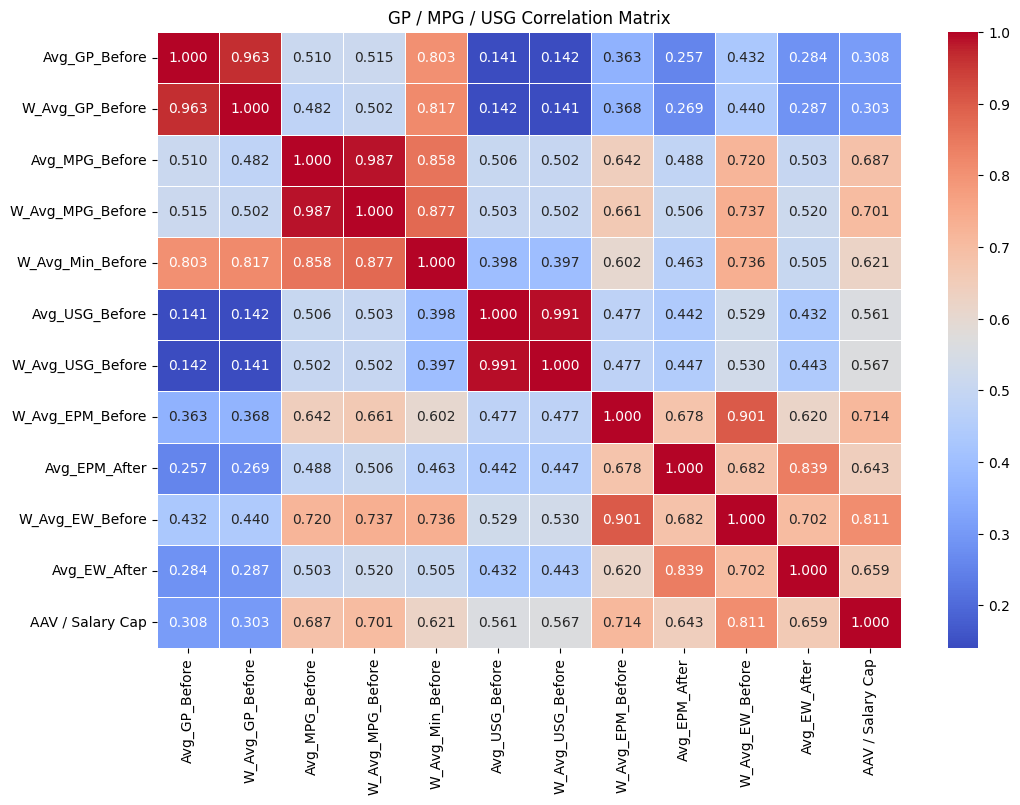

In [26]:
# Specify columns for correlation
new_ft_columns = [
    'Avg_GP_Before', 'W_Avg_GP_Before', 'Avg_MPG_Before', 'W_Avg_MPG_Before', 'W_Avg_Min_Before', 'Avg_USG_Before', 'W_Avg_USG_Before',
    'W_Avg_EPM_Before', 'Avg_EPM_After', 'W_Avg_EW_Before', 'Avg_EW_After', 'AAV / Salary Cap',
]

# Calculate correlation matrix
correlation_matrix = NBA_FVC_filtered[new_ft_columns].corr()

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".3f", linewidths=0.5)
plt.title('GP / MPG / USG Correlation Matrix')
plt.show()

In [44]:
# Specify columns for correlation
contract_columns = [
    'Role', 'Age At Signing', 'W_Avg_Min_Before', 'W_Avg_USG_Before',
    'Avg_EPM_Before', 'W_Avg_EPM_Before', 'Change_EPM_Before', 'Avg_EPM_After',
    'Avg_EW_Before', 'W_Avg_EW_Before', 'Change_EW_Before', 'Avg_EW_After',
    'AAV / Salary Cap', 'AAV / Luxury Tax', 'AAV / 1st Apron', 'AAV / 2nd Apron',
]

# Calculate correlation matrix
correlation_matrix = NBA_FVC_filtered[contract_columns].corr()

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".3f", linewidths=0.5)
plt.title('Contract Correlation Matrix')
plt.show()

KeyError: "['Avg_EPM_After', 'Avg_EW_After'] not in index"

In [28]:
# Summary Statistics for Key Variables ".describe()"

summary_stats = NBA_FVC_filtered[contract_columns].describe()
summary_stats

,Role,Age At Signing,W_Avg_Min_Before,W_Avg_USG_Before,Avg_EPM_Before,W_Avg_EPM_Before,Change_EPM_Before,Avg_EPM_After,Avg_EW_Before,W_Avg_EW_Before,Change_EW_Before,Avg_EW_After,AAV / Salary Cap,AAV / Luxury Tax,AAV / 1st Apron,AAV / 2nd Apron
count,1580.000000,1580.000000,1580.000000,1580.000000,1580.000000,1580.000000,1374.000000,1450.000000,1580.000000,1580.000000,1374.000000,1450.000000,1580.000000,1580.000000,1580.000000,436.000000
mean,1.766456,27.678481,1313.828568,0.183034,-0.624817,-0.620752,0.018694,-1.164056,2.784604,2.793435,0.040620,1.892357,0.073038,0.060219,0.057607,0.071518
std,0.763654,4.066006,675.905960,0.048099,2.306267,2.349266,2.009139,2.520077,3.237106,3.307700,2.634111,2.754684,0.080030,0.065962,0.063113,0.065719
min,1.000000,19.000000,49.999980,0.062020,-6.825025,-6.721380,-8.565390,-7.932920,-1.653090,-1.653090,-14.690915,-2.331170,0.000100,0.000100,0.000100,0.009400
25%,1.000000,24.000000,806.305200,0.148560,-2.169974,-2.257201,-1.278734,-2.874407,0.507388,0.431688,-1.386162,0.032780,0.018400,0.015100,0.014500,0.017500
50%,2.000000,27.000000,1304.534938,0.176785,-0.831013,-0.838534,0.002249,-1.425645,1.809651,1.804607,0.010937,0.905895,0.037500,0.030900,0.029500,0.048200
75%,2.000000,30.000000,1818.485656,0.212605,0.690365,0.750996,1.272081,0.322620,4.019382,4.040384,1.368648,2.785700,0.098700,0.081350,0.077750,0.102450
max,3.000000,42.000000,3087.756769,0.385630,9.344195,9.649615,7.148665,10.443200,22.812600,24.154000,10.791200,20.738550,0.388100,0.319400,0.306200,0.278700


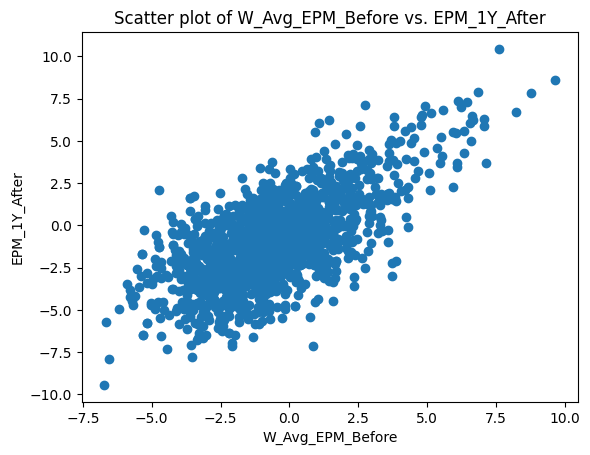

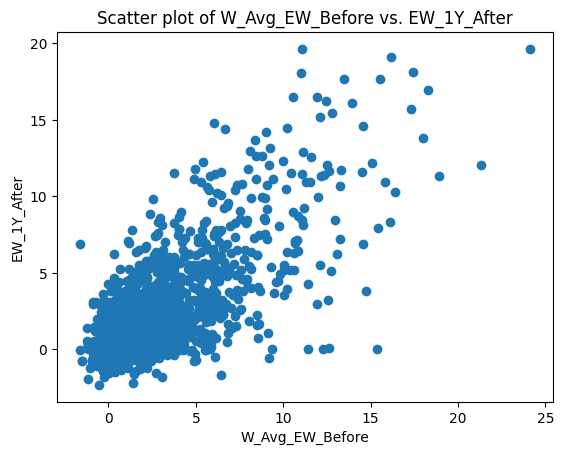

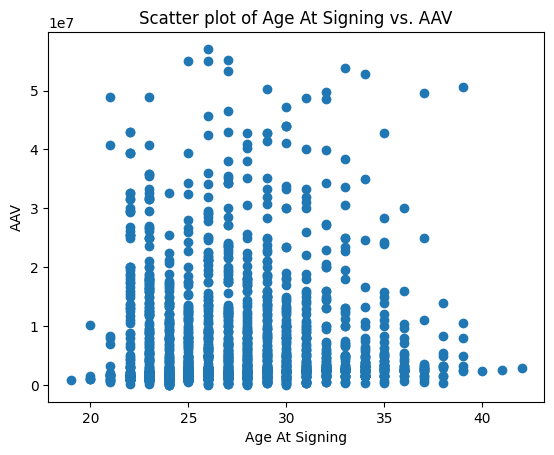

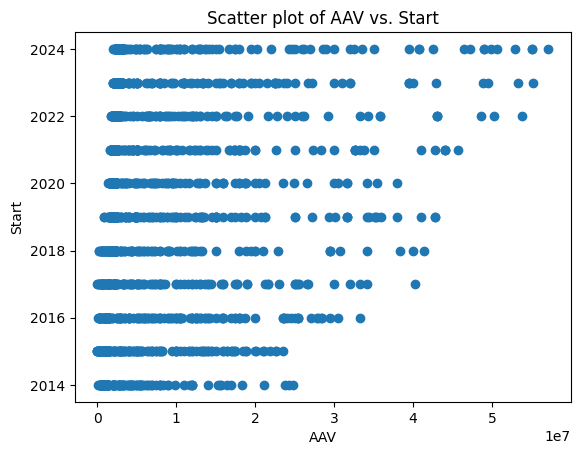

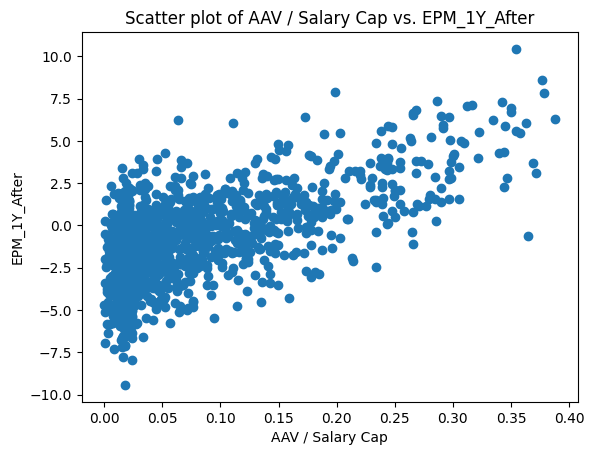

In [29]:
import matplotlib.pyplot as plt


# List of column pairs you want to compare
# Example: [('column1', 'column2'), ('column3', 'column4')]
column_pairs = [('W_Avg_EPM_Before', 'EPM_1Y_After'),
                ('W_Avg_EW_Before', 'EW_1Y_After'),
                ('Age At Signing', 'AAV'),
                ('AAV', 'Start'),
                ('AAV / Salary Cap','EPM_1Y_After')]  # Replace with actual column names

# Create scatter plots for the specified column pairs
for col1, col2 in column_pairs:
    plt.figure()
    plt.scatter(NBA_FVC_filtered[col1], NBA_FVC_filtered[col2])
    plt.xlabel(col1)
    plt.ylabel(col2)
    plt.title(f'Scatter plot of {col1} vs. {col2}')
    plt.show()

# Modeling

In [30]:
# # Convert Data to Z-Scores (the way we are using 'Role' probably needs to change to account for 'tweeners')

# from sklearn.preprocessing import StandardScaler

# columns_to_standardize = [
#     'Role', 'Age At Signing', 'W_Avg_EPM_Before', 'W_Avg_EW_Before'
# ]
# # 'Avg_EPM_After', 'Avg_EW_After'

# # Initialize the StandardScaler
# scaler = StandardScaler()

# # Fit and transform the selected columns
# NBA_FVC_filtered[columns_to_standardize] = scaler.fit_transform(NBA_FVC_filtered[columns_to_standardize])

# NBA_FVC_filtered[['Player', 'Role', 'Age At Signing', 'W_Avg_EPM_Before', 'Avg_EPM_After', 'W_Avg_EW_Before', 'Avg_EW_After']].head()

## EPM

In [31]:
# BASELINE MODELS

from sklearn.metrics import mean_squared_error

NBA_FVC_training_set = NBA_FVC_filtered[(NBA_FVC_filtered['Start'] >= 2014) & (NBA_FVC_filtered['Start'] <= 2022)]
NBA_FVC_test_set = NBA_FVC_filtered[NBA_FVC_filtered['Start'] == 2023].copy()

NBA_FVC_mean_epm = NBA_FVC_filtered['Avg_EPM_After'].mean()
NBA_FVC_test_set['Predicted_Avg_EPM'] = NBA_FVC_mean_epm
NBA_FVC_baseline_rmse = np.sqrt(mean_squared_error(NBA_FVC_test_set['Avg_EPM_After'], NBA_FVC_test_set['Predicted_Avg_EPM']))
print("Baseline RMSE:", NBA_FVC_baseline_rmse.round(4), "Mean:", NBA_FVC_mean_epm.round(4))

Baseline RMSE: 2.7126 Mean: -1.1641


In [32]:
## Checking for NaN predictor values
# NBA_FVC_training_set[['Player', 'Role', 'Age At Signing', 'W_Avg_Min_Before', 'W_Avg_USG_Before', 'W_Avg_EPM_Before', 'Avg_EPM_After']]

In [33]:
# SIMPLE LINEAR EPM MODEL

from sklearn.linear_model import LinearRegression


NBA_FVC_EPM_predictors = ['Is_Guard', 'Is_Wing', 'Is_Big', 'Age At Signing', 'W_Avg_Min_Before', 'W_Avg_USG_Before', 'W_Avg_EPM_Before']

NBA_FVC_EPM_target = 'Avg_EPM_After'

NBA_FVC_EPM_model = LinearRegression()
NBA_FVC_EPM_model.fit(NBA_FVC_training_set[NBA_FVC_EPM_predictors], NBA_FVC_training_set[NBA_FVC_EPM_target])
NBA_FVC_test_set['Linear_Predicted_Avg_EPM'] = NBA_FVC_EPM_model.predict(NBA_FVC_test_set[NBA_FVC_EPM_predictors])

NBA_FVC_EPM_rmse_lm = np.sqrt(mean_squared_error(NBA_FVC_test_set['Avg_EPM_After'], NBA_FVC_test_set['Linear_Predicted_Avg_EPM']))
print("LM RMSE:", NBA_FVC_EPM_rmse_lm.round(4))

NBA_FVC_EPM_r2_lm = NBA_FVC_EPM_model.score(NBA_FVC_test_set[NBA_FVC_EPM_predictors], NBA_FVC_test_set[NBA_FVC_EPM_target])
print("LM R-squared:", NBA_FVC_EPM_r2_lm.round(4))

# Add a residual column to the test set (Residual = Predicted - Actual)
NBA_FVC_test_set['Residual'] = NBA_FVC_test_set['Linear_Predicted_Avg_EPM'] - NBA_FVC_test_set['Avg_EPM_After']

NBA_FVC_test_set[['Player', 'Role', 'Age At Signing', 'W_Avg_Min_Before', 'W_Avg_USG_Before', 'W_Avg_EPM_Before', 'Linear_Predicted_Avg_EPM', 'Avg_EPM_After', 'Residual']]

LM RMSE: 1.7676
LM R-squared: 0.5744


,Player,Role,Age At Signing,W_Avg_Min_Before,W_Avg_USG_Before,W_Avg_EPM_Before,Linear_Predicted_Avg_EPM,Avg_EPM_After,Residual
1754,Nikola Jokic,3,27.0,2361.207875,0.27679,8.231958,5.587626,6.714860,-1.127234
1755,Joel Embiid,3,27.0,2287.317375,0.37309,7.592705,5.932964,10.443200,-4.510236
1756,Ja Morant,1,22.0,1933.890000,0.33609,4.053678,3.464473,2.043530,1.420943
1757,Zion Williamson,2,22.0,955.999500,0.28898,5.089330,3.633388,2.071650,1.561738
1758,Darius Garland,1,22.0,2442.550000,0.26655,4.248712,3.198168,0.486532,2.711636
...,...,...,...,...,...,...,...,...,...
1898,Bol Bol,2,23.0,982.350541,0.17236,-3.337782,-2.455662,0.566898,-3.022560
1900,Moses Brown,3,23.0,306.175093,0.19269,-0.701187,-0.697876,-3.915850,3.217974
1903,Lamar Stevens,2,26.0,1093.867894,0.14460,-2.804603,-2.623219,-2.240640,-0.382579
1904,Sandro Mamukelashvili,3,24.0,594.715569,0.16995,-4.090808,-2.931149,-1.931640,-0.999509


In [34]:
# RANDOM FOREST EPM MODEL

from sklearn.ensemble import RandomForestRegressor

# Initialize the Random Forest Regressor
NBA_FVC_EPM_rf_model = RandomForestRegressor(random_state=42, n_estimators=100)

# Fit the model to the training data
NBA_FVC_EPM_rf_model.fit(NBA_FVC_training_set[NBA_FVC_EPM_predictors], NBA_FVC_training_set[NBA_FVC_EPM_target])

# Make predictions on the test set
NBA_FVC_test_set['RF_Predicted_Avg_EPM'] = NBA_FVC_EPM_rf_model.predict(NBA_FVC_test_set[NBA_FVC_EPM_predictors])

# RMSE & R^2
NBA_FVC_EPM_rmse_rf = np.sqrt(mean_squared_error(NBA_FVC_test_set['Avg_EPM_After'], NBA_FVC_test_set['RF_Predicted_Avg_EPM']))
print("RF RMSE:", NBA_FVC_EPM_rmse_rf.round(4))

NBA_FVC_EPM_r2_rf = NBA_FVC_EPM_rf_model.score(NBA_FVC_test_set[NBA_FVC_EPM_predictors], NBA_FVC_test_set[NBA_FVC_EPM_target])
print("RF R-squared:", NBA_FVC_EPM_r2_rf.round(4))

# Add a residual column to the test set (Residual = Predicted - Actual)
NBA_FVC_test_set['Residual'] = NBA_FVC_test_set['RF_Predicted_Avg_EPM'] - NBA_FVC_test_set['Avg_EPM_After']

# Display the relevant columns
NBA_FVC_test_set[['Player', 'Role', 'Age At Signing', 'W_Avg_Min_Before', 'W_Avg_USG_Before', 'W_Avg_EPM_Before', 'RF_Predicted_Avg_EPM', 'Avg_EPM_After', 'Residual']]

RF RMSE: 1.91
RF R-squared: 0.5031


,Player,Role,Age At Signing,W_Avg_Min_Before,W_Avg_USG_Before,W_Avg_EPM_Before,RF_Predicted_Avg_EPM,Avg_EPM_After,Residual
1754,Nikola Jokic,3,27.0,2361.207875,0.27679,8.231958,4.824664,6.714860,-1.890196
1755,Joel Embiid,3,27.0,2287.317375,0.37309,7.592705,5.404635,10.443200,-5.038565
1756,Ja Morant,1,22.0,1933.890000,0.33609,4.053678,4.176222,2.043530,2.132692
1757,Zion Williamson,2,22.0,955.999500,0.28898,5.089330,6.060687,2.071650,3.989037
1758,Darius Garland,1,22.0,2442.550000,0.26655,4.248712,4.238789,0.486532,3.752257
...,...,...,...,...,...,...,...,...,...
1898,Bol Bol,2,23.0,982.350541,0.17236,-3.337782,-2.927670,0.566898,-3.494568
1900,Moses Brown,3,23.0,306.175093,0.19269,-0.701187,-0.602934,-3.915850,3.312916
1903,Lamar Stevens,2,26.0,1093.867894,0.14460,-2.804603,-1.950003,-2.240640,0.290637
1904,Sandro Mamukelashvili,3,24.0,594.715569,0.16995,-4.090808,-2.073684,-1.931640,-0.142044


In [35]:
# K-NEAREST NEIGHBORS (kNN) EPM MODEL

from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score

# Initialize the kNN Regressor (you can set k using the 'n_neighbors' parameter)
NBA_FVC_EPM_knn_model = KNeighborsRegressor(n_neighbors=13) # k=5 by default
                                                            # "optimal k" code from before wasn't working correctly (likely showing optimal k on training set, rather than test set)
# Fit the model to the training data
NBA_FVC_EPM_knn_model.fit(NBA_FVC_training_set[NBA_FVC_EPM_predictors], NBA_FVC_training_set[NBA_FVC_EPM_target])

# Make predictions on the test set
NBA_FVC_test_set['kNN_Predicted_Avg_EPM'] = NBA_FVC_EPM_knn_model.predict(NBA_FVC_test_set[NBA_FVC_EPM_predictors])

# RMSE & R^2
NBA_FVC_EPM_rmse_kNN = np.sqrt(mean_squared_error(NBA_FVC_test_set['Avg_EPM_After'], NBA_FVC_test_set['kNN_Predicted_Avg_EPM']))
print("kNN RMSE:", NBA_FVC_EPM_rmse_kNN.round(4))

NBA_FVC_EPM_r2_kNN = NBA_FVC_EPM_knn_model.score(NBA_FVC_test_set[NBA_FVC_EPM_predictors], NBA_FVC_test_set[NBA_FVC_EPM_target])
print("kNN R-squared:", NBA_FVC_EPM_r2_kNN.round(4))

# Add a residual column to the test set (Residual = Predicted - Actual)
NBA_FVC_test_set['Residual'] = NBA_FVC_test_set['kNN_Predicted_Avg_EPM'] - NBA_FVC_test_set['Avg_EPM_After']

# Display the relevant columns
NBA_FVC_test_set[['Player', 'Role', 'Age At Signing', 'W_Avg_Min_Before', 'W_Avg_USG_Before', 'W_Avg_EPM_Before', 'kNN_Predicted_Avg_EPM', 'Avg_EPM_After', 'Residual']]

kNN RMSE: 2.4342
kNN R-squared: 0.1928


,Player,Role,Age At Signing,W_Avg_Min_Before,W_Avg_USG_Before,W_Avg_EPM_Before,kNN_Predicted_Avg_EPM,Avg_EPM_After,Residual
1754,Nikola Jokic,3,27.0,2361.207875,0.27679,8.231958,0.753407,6.714860,-5.961453
1755,Joel Embiid,3,27.0,2287.317375,0.37309,7.592705,1.436826,10.443200,-9.006374
1756,Ja Morant,1,22.0,1933.890000,0.33609,4.053678,-0.070555,2.043530,-2.114085
1757,Zion Williamson,2,22.0,955.999500,0.28898,5.089330,-1.535380,2.071650,-3.607030
1758,Darius Garland,1,22.0,2442.550000,0.26655,4.248712,0.639848,0.486532,0.153316
...,...,...,...,...,...,...,...,...,...
1898,Bol Bol,2,23.0,982.350541,0.17236,-3.337782,-2.354276,0.566898,-2.921174
1900,Moses Brown,3,23.0,306.175093,0.19269,-0.701187,-2.640098,-3.915850,1.275752
1903,Lamar Stevens,2,26.0,1093.867894,0.14460,-2.804603,-1.790607,-2.240640,0.450033
1904,Sandro Mamukelashvili,3,24.0,594.715569,0.16995,-4.090808,-2.041845,-1.931640,-0.110205


In [36]:
# GRADIENT BOOSTING EPM MODEL

from sklearn.ensemble import GradientBoostingRegressor

# Initialize the Gradient Boosting Regressor model
NBA_FVC_EPM_gbm = GradientBoostingRegressor()

NBA_FVC_EPM_gbm.fit(NBA_FVC_training_set[NBA_FVC_EPM_predictors], NBA_FVC_training_set[NBA_FVC_EPM_target])

NBA_FVC_test_set['GB_Predicted_Avg_EPM'] = NBA_FVC_EPM_gbm.predict(NBA_FVC_test_set[NBA_FVC_EPM_predictors])

NBA_FVC_EPM_rmse_gbm = np.sqrt(mean_squared_error(NBA_FVC_test_set['Avg_EPM_After'], NBA_FVC_test_set['GB_Predicted_Avg_EPM']))
print("GB RMSE:", NBA_FVC_EPM_rmse_gbm.round(4))

NBA_FVC_EPM_r2_gbm = NBA_FVC_EPM_gbm.score(NBA_FVC_test_set[NBA_FVC_EPM_predictors], NBA_FVC_test_set[NBA_FVC_EPM_target])
print("GB R-squared:", NBA_FVC_EPM_r2_gbm.round(4))

# Add a residual column to the test set (Residual = Predicted - Actual)
NBA_FVC_test_set['Residual'] = NBA_FVC_test_set['GB_Predicted_Avg_EPM'] - NBA_FVC_test_set['Avg_EPM_After']

# Display relevant columns
NBA_FVC_test_set[['Player', 'Role', 'Age At Signing', 'W_Avg_Min_Before', 'W_Avg_USG_Before', 'W_Avg_EPM_Before',
                  'GB_Predicted_Avg_EPM', 'Avg_EPM_After', 'Residual']]

GB RMSE: 1.8453
GB R-squared: 0.5361


,Player,Role,Age At Signing,W_Avg_Min_Before,W_Avg_USG_Before,W_Avg_EPM_Before,GB_Predicted_Avg_EPM,Avg_EPM_After,Residual
1754,Nikola Jokic,3,27.0,2361.207875,0.27679,8.231958,5.255242,6.714860,-1.459618
1755,Joel Embiid,3,27.0,2287.317375,0.37309,7.592705,5.740572,10.443200,-4.702628
1756,Ja Morant,1,22.0,1933.890000,0.33609,4.053678,4.778949,2.043530,2.735419
1757,Zion Williamson,2,22.0,955.999500,0.28898,5.089330,4.534852,2.071650,2.463202
1758,Darius Garland,1,22.0,2442.550000,0.26655,4.248712,3.954334,0.486532,3.467802
...,...,...,...,...,...,...,...,...,...
1898,Bol Bol,2,23.0,982.350541,0.17236,-3.337782,-2.451212,0.566898,-3.018110
1900,Moses Brown,3,23.0,306.175093,0.19269,-0.701187,-0.848056,-3.915850,3.067794
1903,Lamar Stevens,2,26.0,1093.867894,0.14460,-2.804603,-2.560273,-2.240640,-0.319633
1904,Sandro Mamukelashvili,3,24.0,594.715569,0.16995,-4.090808,-2.333976,-1.931640,-0.402336


In [37]:
#XGBoost Model

from xgboost import XGBRegressor

NBA_FVC_EPM_xgb = XGBRegressor()
NBA_FVC_EPM_xgb.fit(NBA_FVC_training_set[NBA_FVC_EPM_predictors], NBA_FVC_training_set[NBA_FVC_EPM_target])
NBA_FVC_test_set['XGB_Predicted_Avg_EPM'] = NBA_FVC_EPM_xgb.predict(NBA_FVC_test_set[NBA_FVC_EPM_predictors])

NBA_FVC_EPM_rmse_xgb = np.sqrt(mean_squared_error(NBA_FVC_test_set['Avg_EPM_After'], NBA_FVC_test_set['XGB_Predicted_Avg_EPM']))
print("XGB RMSE:", NBA_FVC_EPM_rmse_xgb.round(4))

NBA_FVC_EPM_r2_xgb = NBA_FVC_EPM_xgb.score(NBA_FVC_test_set[NBA_FVC_EPM_predictors], NBA_FVC_test_set[NBA_FVC_EPM_target])
print("XGB R-squared:", NBA_FVC_EPM_r2_xgb.round(4))

# Add a residual column to the test set (Residual = Predicted - Actual)
NBA_FVC_test_set['Residual'] = NBA_FVC_test_set['XGB_Predicted_Avg_EPM'] - NBA_FVC_test_set['Avg_EPM_After']

# Display relevant columns
NBA_FVC_test_set[['Player', 'Role', 'Age At Signing', 'W_Avg_Min_Before', 'W_Avg_USG_Before', 'W_Avg_EPM_Before',
                  'XGB_Predicted_Avg_EPM', 'Avg_EPM_After', 'Residual']]

XGB RMSE: 2.1147
XGB R-squared: 0.3909


,Player,Role,Age At Signing,W_Avg_Min_Before,W_Avg_USG_Before,W_Avg_EPM_Before,XGB_Predicted_Avg_EPM,Avg_EPM_After,Residual
1754,Nikola Jokic,3,27.0,2361.207875,0.27679,8.231958,4.860180,6.714860,-1.854680
1755,Joel Embiid,3,27.0,2287.317375,0.37309,7.592705,5.365889,10.443200,-5.077311
1756,Ja Morant,1,22.0,1933.890000,0.33609,4.053678,5.004165,2.043530,2.960635
1757,Zion Williamson,2,22.0,955.999500,0.28898,5.089330,6.745832,2.071650,4.674182
1758,Darius Garland,1,22.0,2442.550000,0.26655,4.248712,4.129625,0.486532,3.643093
...,...,...,...,...,...,...,...,...,...
1898,Bol Bol,2,23.0,982.350541,0.17236,-3.337782,-2.263992,0.566898,-2.830890
1900,Moses Brown,3,23.0,306.175093,0.19269,-0.701187,0.085183,-3.915850,4.001033
1903,Lamar Stevens,2,26.0,1093.867894,0.14460,-2.804603,-1.851875,-2.240640,0.388765
1904,Sandro Mamukelashvili,3,24.0,594.715569,0.16995,-4.090808,-0.162391,-1.931640,1.769249


## EW

In [38]:
# BASELINE MODELS

NBA_FVC_mean_ew = NBA_FVC_filtered['Avg_EW_After'].mean()
NBA_FVC_test_set['Predicted_Avg_EW'] = NBA_FVC_mean_ew
NBA_FVC_baseline_rmse = np.sqrt(mean_squared_error(NBA_FVC_test_set['Avg_EW_After'], NBA_FVC_test_set['Predicted_Avg_EW']))
print("Baseline RMSE:", NBA_FVC_baseline_rmse.round(4), "Mean:", NBA_FVC_mean_ew.round(4))

Baseline RMSE: 1.5593 Mean: 1.8924


In [39]:
# SIMPLE LINEAR EW MODEL

NBA_FVC_EW_predictors = ['Role', 'Age At Signing', 'W_Avg_Min_Before', 'W_Avg_USG_Before', 'W_Avg_EW_Before']

NBA_FVC_EW_target = 'Avg_EW_After'

NBA_FVC_EW_model = LinearRegression()
NBA_FVC_EW_model.fit(NBA_FVC_training_set[NBA_FVC_EW_predictors], NBA_FVC_training_set[NBA_FVC_EW_target])
NBA_FVC_test_set['Linear_Predicted_Avg_EW'] = NBA_FVC_EW_model.predict(NBA_FVC_test_set[NBA_FVC_EW_predictors])

NBA_FVC_EW_rmse_lm = np.sqrt(mean_squared_error(NBA_FVC_test_set['Avg_EW_After'], NBA_FVC_test_set['Linear_Predicted_Avg_EW']))
print("LM RMSE:", NBA_FVC_EW_rmse_lm.round(4))

NBA_FVC_EW_r2_lm = NBA_FVC_EW_model.score(NBA_FVC_test_set[NBA_FVC_EW_predictors], NBA_FVC_test_set[NBA_FVC_EW_target])
print("LM R-squared:", NBA_FVC_EW_r2_lm.round(4))

# Add a residual column to the test set (Residual = Predicted - Actual)
NBA_FVC_test_set['Residual'] = NBA_FVC_test_set['Linear_Predicted_Avg_EW'] - NBA_FVC_test_set['Avg_EW_After']

NBA_FVC_test_set[['Player', 'Role', 'Age At Signing', 'W_Avg_Min_Before', 'W_Avg_USG_Before', 'W_Avg_EW_Before', 'Linear_Predicted_Avg_EW', 'Avg_EW_After', 'Residual']]

LM RMSE: 2.2347
LM R-squared: -3.7221


,Player,Role,Age At Signing,W_Avg_Min_Before,W_Avg_USG_Before,W_Avg_EW_Before,Linear_Predicted_Avg_EW,Avg_EW_After,Residual
1754,Nikola Jokic,3,27.0,2361.207875,0.27679,17.986600,11.657001,2.768360,8.888641
1755,Joel Embiid,3,27.0,2287.317375,0.37309,16.393225,11.333162,2.575400,8.757762
1756,Ja Morant,1,22.0,1933.890000,0.33609,9.121050,7.193575,0.214462,6.979113
1757,Zion Williamson,2,22.0,955.999500,0.28898,5.209160,4.756463,1.062252,3.694211
1758,Darius Garland,1,22.0,2442.550000,0.26655,11.955275,8.400783,0.591834,7.808949
...,...,...,...,...,...,...,...,...,...
1898,Bol Bol,2,23.0,982.350541,0.17236,-0.131101,0.794484,0.691579,0.102905
1900,Moses Brown,3,23.0,306.175093,0.19269,0.407774,1.371183,-0.073281,1.444464
1903,Lamar Stevens,2,26.0,1093.867894,0.14460,0.109290,0.415491,0.168651,0.246840
1904,Sandro Mamukelashvili,3,24.0,594.715569,0.16995,-0.415877,0.628102,0.153730,0.474372


In [40]:
# RANDOM FOREST EW MODEL

# Initialize the Random Forest Regressor
NBA_FVC_EW_rf_model = RandomForestRegressor(random_state=42, n_estimators=100)

# Fit the model to the training data
NBA_FVC_EW_rf_model.fit(NBA_FVC_training_set[NBA_FVC_EW_predictors], NBA_FVC_training_set[NBA_FVC_EW_target])

# Make predictions on the test set
NBA_FVC_test_set['RF_Predicted_Avg_EW'] = NBA_FVC_EW_rf_model.predict(NBA_FVC_test_set[NBA_FVC_EW_predictors])

# RMSE & R^2
NBA_FVC_EW_rmse_rf = np.sqrt(mean_squared_error(NBA_FVC_test_set['Avg_EW_After'], NBA_FVC_test_set['RF_Predicted_Avg_EW']))
print("RF RMSE:", NBA_FVC_EW_rmse_rf.round(4))

NBA_FVC_EW_r2_rf = NBA_FVC_EW_rf_model.score(NBA_FVC_test_set[NBA_FVC_EW_predictors], NBA_FVC_test_set[NBA_FVC_EW_target])
print("RF R-squared:", NBA_FVC_EW_r2_rf.round(4))

# Add a residual column to the test set (Residual = Predicted - Actual)
NBA_FVC_test_set['Residual'] = NBA_FVC_test_set['RF_Predicted_Avg_EW'] - NBA_FVC_test_set['Avg_EW_After']

# Display the relevant columns
NBA_FVC_test_set[['Player', 'Role', 'Age At Signing', 'W_Avg_Min_Before', 'W_Avg_USG_Before', 'W_Avg_EW_Before', 'RF_Predicted_Avg_EW', 'Avg_EW_After', 'Residual']]

RF RMSE: 2.5255
RF R-squared: -5.031


,Player,Role,Age At Signing,W_Avg_Min_Before,W_Avg_USG_Before,W_Avg_EW_Before,RF_Predicted_Avg_EW,Avg_EW_After,Residual
1754,Nikola Jokic,3,27.0,2361.207875,0.27679,17.986600,13.030977,2.768360,10.262617
1755,Joel Embiid,3,27.0,2287.317375,0.37309,16.393225,13.603885,2.575400,11.028485
1756,Ja Morant,1,22.0,1933.890000,0.33609,9.121050,8.813015,0.214462,8.598553
1757,Zion Williamson,2,22.0,955.999500,0.28898,5.209160,5.969167,1.062252,4.906915
1758,Darius Garland,1,22.0,2442.550000,0.26655,11.955275,9.677073,0.591834,9.085239
...,...,...,...,...,...,...,...,...,...
1898,Bol Bol,2,23.0,982.350541,0.17236,-0.131101,0.267490,0.691579,-0.424089
1900,Moses Brown,3,23.0,306.175093,0.19269,0.407774,1.056856,-0.073281,1.130137
1903,Lamar Stevens,2,26.0,1093.867894,0.14460,0.109290,0.936984,0.168651,0.768333
1904,Sandro Mamukelashvili,3,24.0,594.715569,0.16995,-0.415877,0.383847,0.153730,0.230117


#Front End Development

###Shiny
